<a href="https://colab.research.google.com/github/joosk3R/jskRprac/blob/main/dacon_e_e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/train.csv")

In [ ]:
test = pd.read_csv("/content/test.csv")
sample = pd.read_csv("/content/sample_submission.csv")

In [ ]:
df = pd.DataFrame()

In [ ]:
df["date"] = train['일시'].apply(lambda x : int(x[0:8]))

In [ ]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with a column named 'date' containing date values
# Convert the 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# Create a new column 'is_weekend' indicating weekends as 1 and weekdays as 0
df['is_weekend'] = df['date'].dt.dayofweek // 5

# Output the modified DataFrame
print(df)

             date  is_weekend
0      2022-06-01           0
1      2022-06-01           0
2      2022-06-01           0
3      2022-06-01           0
4      2022-06-01           0
...           ...         ...
203995 2022-08-24           0
203996 2022-08-24           0
203997 2022-08-24           0
203998 2022-08-24           0
203999 2022-08-24           0

[204000 rows x 2 columns]


In [ ]:
bd = pd.read_csv("/content/building_info.csv")

In [ ]:
train["강수량(mm)"] = train["강수량(mm)"].fillna(0)
train["일사(MJ/m2)"] = train["일사(MJ/m2)"].fillna(0)
train["일조(hr)"] = train["일조(hr)"].fillna(0)
train["풍속(m/s)"] = train["풍속(m/s)"].fillna(method='bfill')
train["습도(%)"] = train["습도(%)"].fillna(method='bfill')

In [ ]:
train['month'] = train['일시'].apply(lambda x : int(x[4:6]))
train['day'] = train['일시'].apply(lambda x : int(x[6:8]))
train['time'] = train['일시'].apply(lambda x : int(x[9:11]))

In [ ]:
test['month'] = test['일시'].apply(lambda x : int(x[4:6]))
test['day'] = test['일시'].apply(lambda x : int(x[6:8]))
test['time'] = test['일시'].apply(lambda x : int(x[9:11]))

In [ ]:
train_x = train.drop(columns=['num_date_time', '일시', '일조(hr)', '일사(MJ/m2)'])
train_y = train['전력소비량(kWh)']

In [ ]:
test_x = test.drop(columns=['num_date_time', '일시'])


In [ ]:
train_x['is_weekend']  =df["is_weekend"]
train_x['is_working_hour'] = train_x['time'].apply(lambda x: 1 if 7 <= x <= 21 else 0)

test_x['is_weekend']  =df["is_weekend"]
test_x['is_working_hour'] = test_x['time'].apply(lambda x: 1 if 7 <= x <= 21 else 0)


In [ ]:
import pandas as pd

# Assuming you have already loaded your data into df1 and df2

# Merge df1 and df2 on "Building Number" column
train_df = train_x.merge(bd, on="건물번호", how="inner")
test_df = test_x.merge(bd, on="건물번호", how="inner")


In [ ]:
y = train_df["전력소비량(kWh)"]


In [ ]:
train_df = train_df.drop(columns=["전력소비량(kWh)", 'month','day','time'])
test_df = test_df.drop(columns=[ 'month','day','time'])

In [ ]:
train_dum = pd.get_dummies(train_df, columns = ['is_working_hour','is_weekend','건물유형'])
test_dum = pd.get_dummies(test_df, columns = ['is_working_hour','is_weekend','건물유형'])
train_dum.head()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW),...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,1,18.6,0.0,0.9,42.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
1,1,18.0,0.0,1.1,45.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
2,1,17.7,0.0,1.5,45.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
3,1,16.7,0.0,1.4,48.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0
4,1,18.4,0.0,2.8,43.0,110634.0,39570.0,-,-,-,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_X = train_dum.drop(columns=['건물번호','태양광용량(kW)', 'ESS저장용량(kWh)','강수량(mm)',
       'PCS용량(kW)',])
test_X = test_dum.drop(columns=['건물번호','태양광용량(kW)', 'ESS저장용량(kWh)','강수량(mm)',
       'PCS용량(kW)',])

In [ ]:
from sklearn.preprocessing import Normalizer # 정규화

norm = Normalizer()
X_train_scaled = norm.fit_transform(train_X.iloc[:,0:5])
X_test_scaled = norm.transform(test_X.iloc[:,0:5])

In [ ]:
train_scaled = pd.DataFrame(data = X_train_scaled)
test_scaled = pd.DataFrame(data = X_test_scaled)

In [ ]:
train_xx = pd.concat([train_scaled,train_X.iloc[:,5:]],axis=1)
test_xx = pd.concat([test_scaled,test_X.iloc[:,5:]],axis=1)

In [ ]:
train_xx

,0,1,2,3,4,is_working_hour_0,is_working_hour_1,is_weekend_0,is_weekend_1,건물유형_건물기타,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,0.000158,0.000008,0.000357,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000153,0.000009,0.000383,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000151,0.000013,0.000383,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000142,0.000012,0.000409,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000157,0.000024,0.000366,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,0.000330,0.000013,0.001227,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203996,0.000320,0.000019,0.001227,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203997,0.000304,0.000014,0.001313,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
203998,0.000300,0.000004,0.001342,0.820659,0.571417,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
test_xx

,0,1,2,3,4,is_working_hour_0,is_working_hour_1,is_weekend_0,is_weekend_1,건물유형_건물기타,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,0.000200,0.000019,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000196,0.000008,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000193,0.000013,0.000638,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000188,0.000011,0.000664,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000186,0.000009,0.000655,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0.000321,0.000013,0.001199,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16796,0.000295,0.000006,0.001356,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16797,0.000288,0.000006,0.001399,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16798,0.000287,0.000016,0.001384,0.820659,0.571417,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y

0         1085.28
1         1047.36
2          974.88
3          953.76
4          986.40
           ...   
203995     881.04
203996     798.96
203997     825.12
203998     640.08
203999     540.24
Name: 전력소비량(kWh), Length: 204000, dtype: float64

In [ ]:
!pip install autogluon

In [ ]:
train_x = pd.concat([train_xx,y],axis=1)
test_x = test_xx

In [ ]:
test_x

,0,1,2,3,4,is_working_hour_0,is_working_hour_1,is_weekend_0,is_weekend_1,건물유형_건물기타,...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,0.000200,0.000019,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0.000196,0.000008,0.000613,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.000193,0.000013,0.000638,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000188,0.000011,0.000664,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.000186,0.000009,0.000655,0.941586,0.336773,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16795,0.000321,0.000013,0.001199,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16796,0.000295,0.000006,0.001356,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16797,0.000288,0.000006,0.001399,0.820659,0.571417,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
16798,0.000287,0.000016,0.001384,0.820659,0.571417,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
import os
import pandas as pd
import random
import numpy as np
from autogluon.tabular import TabularDataset, TabularPredictor
import autogluon.core as ag

import warnings
warnings.filterwarnings("ignore")

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(69)


In [ ]:
train_data = TabularDataset(train_x)
test_data = TabularDataset(test_x)

In [ ]:
label = '전력소비량(kWh)'
eval_metric = 'rmse'
time_limit = 3600*2

In [ ]:
excluded_model_types = ['CAT']
predictor = TabularPredictor(
    label=label, problem_type='regression', eval_metric=eval_metric
).fit(train_data,
      presets='best_quality',
      num_stack_levels=3,
      excluded_model_types = excluded_model_types,
      time_limit=time_limit, num_gpus=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20230719_031957/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=3, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 7200s
AutoGluon will save models to "AutogluonModels/ag-20230719_031957/"
AutoGluon Version:  0.8.2
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Jun 9 10:57:30 UTC 2023
Disk Space Avail:   146.04 GB / 179.07 GB (81.6%)
Train Data Rows:    204000
Train Data Columns: 21
Label Column: 전력소비량(kWh)
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    24030.93 MB
	Train Data (Original)  Memory Usage: 11.42 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stag

In [ ]:
model_to_use = predictor.get_model_best()
model_pred = predictor.predict(test_data, model=model_to_use)

submission = pd.read_csv('/content/sample_submission.csv')

submission["전화해지여부"] = model_pred
submission.to_csv('./Gluon_submission.csv', index=False, encoding="utf-8")

autogluon결과 전체 데이터를 사용하면 예측력이 떨어짐 시계열 형태로
 각각의 건물마다 데이터를
 추정해주는것이 좋을 것 같음

---



In [1]:
!pip install sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.2/118.2 kB 12.0 MB/s eta 0:00:00


In [2]:
import sys
import sktime
import tqdm as tq
import xgboost as xgb
import matplotlib
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np
print("-------------------------- Python & library version --------------------------")
print("Python version: {}".format(sys.version))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("matplotlib version: {}".format(matplotlib.__version__))
print("tqdm version: {}".format(tq.__version__))
print("sktime version: {}".format(sktime.__version__))
print("xgboost version: {}".format(xgb.__version__))
print("seaborn version: {}".format(sns.__version__))
print("scikit-learn version: {}".format(skl.__version__))
print("------------------------------------------------------------------------------")

-------------------------- Python & library version --------------------------
Python version: 3.10.6 (main, May 29 2023, 11:10:38) [GCC 11.3.0]
pandas version: 1.5.3
numpy version: 1.22.4
matplotlib version: 3.7.1
tqdm version: 4.65.0
sktime version: 0.20.1
xgboost version: 1.7.6
seaborn version: 0.12.2
scikit-learn version: 1.2.2
------------------------------------------------------------------------------


In [3]:
import matplotlib.pyplot as plt
from tqdm import tqdm
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from xgboost import XGBRegressor

pd.set_option('display.max_columns', 30)

In [5]:
train = pd.read_csv('/content/train.csv')

FileNotFoundError: ignored

In [ ]:
train = train.drop(columns=["num_date_time",'일사(MJ/m2)'])

In [ ]:
bd=pd.read_csv("/content/building_info.csv")

In [ ]:
train_df = train.merge(bd, on="건물번호", how="inner")


In [ ]:
train_df

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,건물기타,110634.00,39570.00,-,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,건물기타,110634.00,39570.00,-,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,건물기타,110634.00,39570.00,-,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,건물기타,110634.00,39570.00,-,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,건물기타,110634.00,39570.00,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,호텔및리조트,57497.84,40035.23,-,-,-
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,호텔및리조트,57497.84,40035.23,-,-,-
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,호텔및리조트,57497.84,40035.23,-,-,-
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,호텔및리조트,57497.84,40035.23,-,-,-


In [ ]:
test_df = test_x.merge(bd, on="건물번호", how="inner")

NameError: ignored

In [ ]:
train_df = train_df.drop(columns=["건물유형", "연면적(m2)" ,"냉방면적(m2)","PCS용량(kW)"])

In [ ]:
train = train_df

In [ ]:
train_df = train_df.drop(columns=['month','day','time'])
test_df = test_df.drop(columns=[ 'month','day','time'])

In [ ]:
train

,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),전력소비량(kWh),태양광용량(kW),ESS저장용량(kWh)
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-
...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-


In [ ]:
## 변수들을 영문명으로 변경
cols = ['num', 'date_time',  'temp','prec', 'wind',"hum",'sun','power', 'non_elec', 'solar']
train.columns = cols

# 시간 관련 변수들 생성
date = pd.to_datetime(train.date_time)
train['hour'] = date.dt.hour
train['day'] = date.dt.weekday
train['month'] = date.dt.month
train['week'] = date.dt.weekofyear

#######################################
## 건물별, 요일별, 시간별 발전량 평균 넣어주기
#######################################
power_mean = pd.pivot_table(train, values = 'power', index = ['num', 'hour', 'day'], aggfunc = np.mean).reset_index()
tqdm.pandas()
train['day_hour_mean'] = train.progress_apply(lambda x : power_mean.loc[(power_mean.num == x['num']) & (power_mean.hour == x['hour']) & (power_mean.day == x['day']) ,'power'].values[0], axis = 1)



<ipython-input-71-f6782bb1e542>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  train['week'] = date.dt.weekofyear
100%|██████████| 204000/204000 [02:08<00:00, 1587.36it/s]


In [ ]:
#######################################
## 건물별 시간별 발전량 평균 넣어주기
#######################################
power_hour_mean = pd.pivot_table(train, values = 'power', index = ['num', 'hour'], aggfunc = np.mean).reset_index()
tqdm.pandas()
train['hour_mean'] = train.progress_apply(lambda x : power_hour_mean.loc[(power_hour_mean.num == x['num']) & (power_hour_mean.hour == x['hour']) ,'power'].values[0], axis = 1)



100%|██████████| 204000/204000 [01:25<00:00, 2380.21it/s]


In [ ]:
train

,num,date_time,temp,prec,wind,hum,sun,power,non_elec,solar,hour,day,month,week,day_hour_mean
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-,0,2,6,22,1774.744615
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-,1,2,6,22,1687.347692
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-,2,2,6,22,1571.483077
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-,3,2,6,22,1522.153846
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-,4,2,6,22,1506.793846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-,19,2,8,34,964.873846
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-,20,2,8,34,882.184615
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-,21,2,8,34,779.095385
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-,22,2,8,34,663.267692


In [ ]:
#######################################
## 건물별 시간별 발전량 표준편차 넣어주기
#######################################
power_hour_std = pd.pivot_table(train, values = 'power', index = ['num', 'hour'], aggfunc = np.std).reset_index()
tqdm.pandas()
train['hour_std'] = train.progress_apply(lambda x : power_hour_std.loc[(power_hour_std.num == x['num']) & (power_hour_std.hour == x['hour']) ,'power'].values[0], axis = 1)



100%|██████████| 204000/204000 [01:24<00:00, 2422.37it/s]


In [ ]:
train

,num,date_time,temp,prec,wind,hum,sun,power,non_elec,solar,hour,day,month,week,day_hour_mean,hour_std
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-,0,2,6,22,1774.744615,446.882767
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-,1,2,6,22,1687.347692,439.662704
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-,2,2,6,22,1571.483077,412.071906
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-,3,2,6,22,1522.153846,391.205981
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-,4,2,6,22,1506.793846,381.099697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-,19,2,8,34,964.873846,161.399578
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-,20,2,8,34,882.184615,137.566008
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-,21,2,8,34,779.095385,128.300189
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-,22,2,8,34,663.267692,112.464079


In [ ]:
### 공휴일 변수 추가
train['holiday'] = train.apply(lambda x : 0 if x['day']<5 else 1, axis = 1)
train.loc[('202208315'<=train.date_time)&(train.date_time<'20220816'), 'holiday'] = 1



In [ ]:
train["holiday"].sum()

57600

In [ ]:
## https://dacon.io/competitions/official/235680/codeshare/2366?page=1&dtype=recent
train['sin_time'] = np.sin(2*np.pi*train.hour/24)
train['cos_time'] = np.cos(2*np.pi*train.hour/24)

## https://dacon.io/competitions/official/235736/codeshare/2743?page=1&dtype=recent
train['THI'] = 9/5*train['temp'] - 0.55*(1-train['hum']/100)*(9/5*train['hum']-26)+32


In [ ]:
train

,num,date_time,temp,wind,hum,prec,sun,power,non_elec,solar,hour,day,month,week,day_hour_mean,hour_mean,hour_std,holiday,sin_time,cos_time,THI
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,-,-,0,2,6,22,1774.744615,1706.318118,446.882767,0,0.000000,1.000000,78.768319
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,-,-,1,2,6,22,1687.347692,1622.620235,439.662704,0,0.258819,0.965926,77.465679
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,-,-,2,2,6,22,1571.483077,1506.971294,412.071906,0,0.500000,0.866025,76.482775
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,-,-,3,2,6,22,1522.153846,1437.365647,391.205981,0,0.707107,0.707107,74.793204
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,-,-,4,2,6,22,1506.793846,1447.321412,381.099697,0,0.866025,0.500000,76.325216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,NaN,0.9,86.0,0.5,881.04,-,-,19,2,8,34,964.873846,1010.462118,161.399578,0,-0.965926,0.258819,86.868319
203996,100,20220824 20,22.4,NaN,1.3,86.0,0.0,798.96,-,-,20,2,8,34,882.184615,928.125176,137.566008,0,-0.866025,0.500000,85.163831
203997,100,20220824 21,21.3,NaN,1.0,92.0,NaN,825.12,-,-,21,2,8,34,779.095385,830.032941,128.300189,0,-0.707107,0.707107,83.516900
203998,100,20220824 22,21.0,NaN,0.3,94.0,NaN,640.08,-,-,22,2,8,34,663.267692,723.100235,112.464079,0,-0.500000,0.866025,83.760991


In [ ]:
len(temp['temp'].values)

2040

In [ ]:

def CDH(xs):
    ys = []
    for i in range(len(xs)):
        if i < 11:
            ys.append(np.sum(xs[:(i+1)]-26))
        else:
            ys.append(np.sum(xs[(i-11):(i+1)]-26))
    return np.array(ys)

cdhs = np.array([])
for num in range(1,101,1):
    temp = train[train['num'] == num]
    cdh = CDH(temp['temp'].values)
    cdhs = np.concatenate([cdhs, cdh])
train['CDH'] = cdhs

train.drop(['non_elec','solar','hour'], axis = 1, inplace = True)
train.head()

,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,1,20220601 00,18.6,NaN,0.9,42.0,NaN,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,20220601 01,18.0,NaN,1.1,45.0,NaN,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,1,20220601 02,17.7,NaN,1.5,45.0,NaN,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,1,20220601 03,16.7,NaN,1.4,48.0,NaN,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,1,20220601 04,18.4,NaN,2.8,43.0,NaN,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6


In [ ]:
train_h= pd.read_csv('/content/train.csv')

In [ ]:
train_h

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [ ]:
train["prec"] = train["prec"].fillna(0)
train["sun"] = train["sun"].fillna(0)


In [ ]:
date

0        2022-06-01 00:00:00
1        2022-06-01 01:00:00
2        2022-06-01 02:00:00
3        2022-06-01 03:00:00
4        2022-06-01 04:00:00
                 ...        
203995   2022-08-24 19:00:00
203996   2022-08-24 20:00:00
203997   2022-08-24 21:00:00
203998   2022-08-24 22:00:00
203999   2022-08-24 23:00:00
Name: date_time, Length: 204000, dtype: datetime64[ns]

In [ ]:
date.dt.weekday.value_counts()

2    31200
3    28800
4    28800
5    28800
6    28800
0    28800
1    28800
Name: date_time, dtype: int64

In [ ]:
train

In [1]:
train.to_csv('/content/drive/MyDrive/energe/train_process.csv')

NameError: ignored

In [ ]:
y = train.loc[train.num == 7, 'power']
x= train.drop(columns=["power"])

In [ ]:
x

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
12240,17.9,0.0,1.0,48.0,0.0,560.16,2,6,22,440.640000,126.070453,0,0.000000,1.000000,46.9456,-8.1
12241,17.7,0.0,1.2,50.0,0.0,563.28,2,6,22,442.744615,123.066606,0,0.258819,0.965926,46.2600,-16.4
12242,17.5,0.0,1.7,49.0,0.0,541.68,2,6,22,434.658462,119.876241,0,0.500000,0.866025,46.0529,-24.9
12243,15.9,0.0,0.4,54.0,0.0,526.56,2,6,22,426.793846,120.835148,0,0.707107,0.707107,42.6064,-35.0
12244,16.6,0.0,2.6,53.0,0.0,532.32,2,6,22,428.252308,120.757547,0,0.866025,0.500000,43.9401,-44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,25.9,0.0,2.3,63.0,0.0,906.24,2,8,34,954.443077,219.347300,0,-0.965926,0.258819,60.8341,1.4
14276,24.8,0.0,2.7,66.0,0.0,831.60,2,8,34,931.716923,220.604075,0,-0.866025,0.500000,59.2864,1.7
14277,23.9,0.0,1.9,70.0,0.0,612.96,2,8,34,686.547692,191.310273,0,-0.707107,0.707107,58.5200,0.4
14278,23.6,0.0,0.7,71.0,0.0,462.96,2,8,34,539.353846,150.566723,0,-0.500000,0.866025,58.2429,-1.4


In [ ]:
x_train

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
12240,17.9,0.0,1.0,48.0,0.0,560.16,2,6,22,440.640000,126.070453,0,0.000000,1.000000,46.9456,-8.1
12241,17.7,0.0,1.2,50.0,0.0,563.28,2,6,22,442.744615,123.066606,0,0.258819,0.965926,46.2600,-16.4
12242,17.5,0.0,1.7,49.0,0.0,541.68,2,6,22,434.658462,119.876241,0,0.500000,0.866025,46.0529,-24.9
12243,15.9,0.0,0.4,54.0,0.0,526.56,2,6,22,426.793846,120.835148,0,0.707107,0.707107,42.6064,-35.0
12244,16.6,0.0,2.6,53.0,0.0,532.32,2,6,22,428.252308,120.757547,0,0.866025,0.500000,43.9401,-44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14107,25.4,0.0,2.0,74.0,0.8,938.40,2,8,33,954.443077,219.347300,0,-0.965926,0.258819,62.3904,18.4
14108,24.5,0.0,2.7,79.0,0.0,893.04,2,8,33,931.716923,220.604075,0,-0.866025,0.500000,62.6789,18.4
14109,23.8,0.0,1.2,85.0,0.0,576.96,2,8,33,686.547692,191.310273,0,-0.707107,0.707107,64.3625,16.6
14110,23.3,0.0,1.5,86.0,0.0,460.80,2,8,33,539.353846,150.566723,0,-0.500000,0.866025,64.0224,13.9


In [ ]:
train.loc[train.num == 7, ]

,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
12240,7,20220601 00,17.9,0.0,1.0,48.0,0.0,560.16,2,6,22,440.640000,126.070453,0,0.000000,1.000000,46.9456,-8.1
12241,7,20220601 01,17.7,0.0,1.2,50.0,0.0,563.28,2,6,22,442.744615,123.066606,0,0.258819,0.965926,46.2600,-16.4
12242,7,20220601 02,17.5,0.0,1.7,49.0,0.0,541.68,2,6,22,434.658462,119.876241,0,0.500000,0.866025,46.0529,-24.9
12243,7,20220601 03,15.9,0.0,0.4,54.0,0.0,526.56,2,6,22,426.793846,120.835148,0,0.707107,0.707107,42.6064,-35.0
12244,7,20220601 04,16.6,0.0,2.6,53.0,0.0,532.32,2,6,22,428.252308,120.757547,0,0.866025,0.500000,43.9401,-44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14275,7,20220824 19,25.9,0.0,2.3,63.0,0.0,906.24,2,8,34,954.443077,219.347300,0,-0.965926,0.258819,60.8341,1.4
14276,7,20220824 20,24.8,0.0,2.7,66.0,0.0,831.60,2,8,34,931.716923,220.604075,0,-0.866025,0.500000,59.2864,1.7
14277,7,20220824 21,23.9,0.0,1.9,70.0,0.0,612.96,2,8,34,686.547692,191.310273,0,-0.707107,0.707107,58.5200,0.4
14278,7,20220824 22,23.6,0.0,0.7,71.0,0.0,462.96,2,8,34,539.353846,150.566723,0,-0.500000,0.866025,58.2429,-1.4


train data shape
x:(1872, 16), y:(1872,)


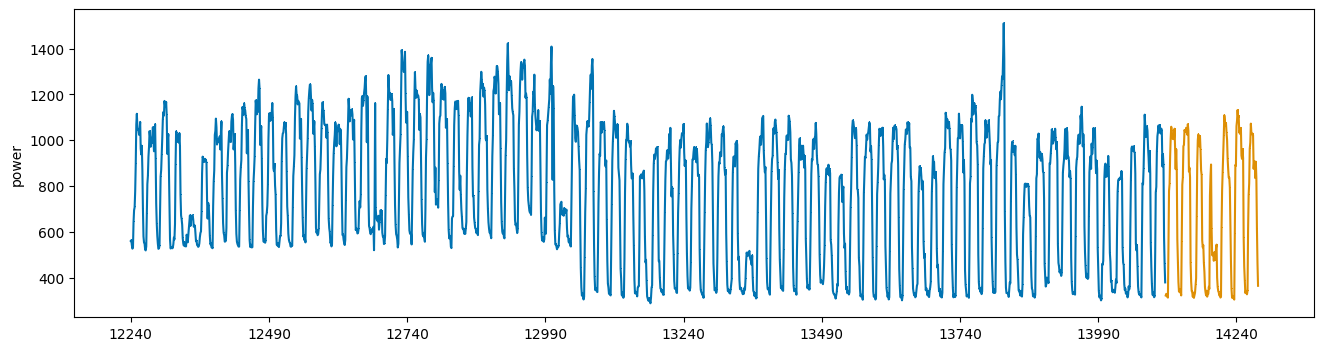

In [ ]:
x = train.loc[train.num == 7, ].iloc[:, 2:]

y_train, y_valid, x_train, x_valid = temporal_train_test_split(y = y, X = x, test_size = 168) # 24시간*7일 = 168

print('train data shape\nx:{}, y:{}'.format(x_train.shape, y_train.shape))

plot_series(y_train, y_valid, markers=[',' , ','])
plt.show()

In [4]:
# Define SMAPE loss function
def SMAPE(true, pred):
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred))) * 100

In [5]:
print("실제값이 100일 때 50으로 underestimate할 때의 SMAPE : {}".format(SMAPE(100, 50)))
print("실제값이 100일 때 150으로 overestimate할 때의 SMAPE : {}".format(SMAPE(100, 150)))

NameError: ignored

In [5]:
def weighted_mse(alpha = 1):
    def weighted_mse_fixed(label, pred):
        residual = (label - pred).astype("float")
        grad = np.where(residual>0, -2*alpha*residual, -2*residual)
        hess = np.where(residual>0, 2*alpha, 2.0)
        return grad, hess
    return weighted_mse_fixed

In [6]:
xgb_reg = XGBRegressor(n_estimators = 10000, seed=0,alpha=100)

xgb_reg.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)],
        early_stopping_rounds=300,
       verbose=False)

NameError: ignored

In [7]:
from sklearn.metrics import make_scorer
smape = make_scorer(SMAPE, greater_is_better = False)

In [ ]:
train

,num,date_time,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,1,20220601 00,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,1,20220601 01,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,1,20220601 02,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,1,20220601 03,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,1,20220601 04,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203995,100,20220824 19,23.1,0.0,0.9,86.0,0.5,881.04,2,8,34,964.873846,161.399578,0,-0.965926,0.258819,63.6624,-19.6
203996,100,20220824 20,22.4,0.0,1.3,86.0,0.0,798.96,2,8,34,882.184615,137.566008,0,-0.866025,0.500000,62.4024,-20.2
203997,100,20220824 21,21.3,0.0,1.0,92.0,0.0,825.12,2,8,34,779.095385,128.300189,0,-0.707107,0.707107,64.1976,-22.3
203998,100,20220824 22,21.0,0.0,0.3,94.0,0.0,640.08,2,8,34,663.267692,112.464079,0,-0.500000,0.866025,65.0744,-25.1


In [ ]:
x

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,25.5,0.0,2.9,63.0,0.1,2517.12,2,8,34,2571.470769,377.509334,0,-0.965926,0.258819,60.1141,3.1
2036,25.0,0.0,2.6,66.0,0.0,2208.96,2,8,34,2391.027692,356.589629,0,-0.866025,0.500000,59.6464,4.3
2037,24.6,0.0,1.3,67.0,0.0,1806.24,2,8,34,1887.950769,216.680162,0,-0.707107,0.707107,59.1101,4.2
2038,24.1,0.0,2.1,70.0,0.0,1387.20,2,8,34,1412.861538,114.999557,0,-0.500000,0.866025,58.8800,2.3


In [ ]:
h_train =x[:-168]
h_valid =x[-168:]

In [ ]:
h_valid

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
1872,24.1,0.0,2.1,78.0,0.0,1898.88,3,8,33,1627.800000,446.882767,0,0.000000,1.000000,61.5376,17.4
1873,23.4,0.0,2.2,82.0,0.0,1804.80,3,8,33,1550.080000,439.662704,0,0.258819,0.965926,62.0816,10.7
1874,23.1,0.0,2.0,84.0,0.0,1626.72,3,8,33,1431.120000,412.071906,0,0.500000,0.866025,62.5624,3.6
1875,23.2,0.0,1.9,84.0,0.0,1565.28,3,8,33,1372.200000,391.205981,0,0.707107,0.707107,62.7424,-1.6
1876,22.7,0.0,2.1,87.0,0.0,1584.48,3,8,33,1381.720000,381.099697,0,0.866025,0.500000,63.5221,-8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,25.5,0.0,2.9,63.0,0.1,2517.12,2,8,34,2571.470769,377.509334,0,-0.965926,0.258819,60.1141,3.1
2036,25.0,0.0,2.6,66.0,0.0,2208.96,2,8,34,2391.027692,356.589629,0,-0.866025,0.500000,59.6464,4.3
2037,24.6,0.0,1.3,67.0,0.0,1806.24,2,8,34,1887.950769,216.680162,0,-0.707107,0.707107,59.1101,4.2
2038,24.1,0.0,2.1,70.0,0.0,1387.20,2,8,34,1412.861538,114.999557,0,-0.500000,0.866025,58.8800,2.3


In [2]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 9.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import re
import optuna
from optuna.integration import XGBoostPruningCallback
sns.set_theme(style="darkgrid")

In [9]:
train=pd.read_csv("/content/drive/MyDrive/energe/train_process.csv")

In [10]:
y = train["power"]
k = train.drop(columns=["power"])

In [9]:
h_train_X = x[:-168]
h_valid_X = x[-168:]
h_train_y = y[:-168]
h_valid_y = y[-168:]

print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(203832, 18) (203832,) (168, 18) (168,)


In [19]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)

for i in tqdm(np.arange(1, 101,1)):
    y = train.loc[train.num == i, 'power']
    x = x.loc[train.num == i, ].iloc[:, 3:]
    y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = 168)
    def objective(trial):
      param = {
          'objective': 'regression', # 회귀
          'verbose': -1,
          'metric': smape,
          'max_depth': trial.suggest_int('max_depth',3, 15),
          'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
         'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
          'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
          'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
      }

     model = xgb.XGBRegressor(**param)
     xgb_model = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0, early_stopping_rounds=25)
     Smape = SMAPE(h_valid_y, xgb_model.predict(h_valid_X))
      return Smape

  study_xgb = optuna.create_study(direction='minimize', sampler=sampler)
  study_xgb.optimize(objective, n_trials=100)

IndentationError: ignored

In [ ]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
df = pd.DataFrame(columns = ['n_estimators', 'eta', 'min_child_weight','max_depth', 'colsample_bytree', 'subsample'])
preds = np.array([])

grid = {'n_estimators' : [100], 'eta' : [0.01], 'min_child_weight' : np.arange(1, 8, 1),
        'max_depth' : np.arange(3,9,1) , 'colsample_bytree' :np.arange(0.8, 1.0, 0.1),
        'subsample' :np.arange(0.8, 1.0, 0.1)} # fix the n_estimators & eta(learning rate)

for i in tqdm(np.arange(1, 101,1)):
    y = train.loc[train.num == i, 'power']
    x = k.loc[k.num == i, ].iloc[:, 3:]
    y_train, y_test, x_train, x_test = temporal_train_test_split(y = y, X = x, test_size = 168)


    pds = PredefinedSplit(np.append(-np.ones(len(x)-168), np.zeros(168)))
    gcv = GridSearchCV(estimator = XGBRegressor(seed = 0, gpu_id = 0,
                                                tree_method = 'gpu_hist', predictor= 'gpu_predictor'),
                       param_grid = grid, scoring = smape, cv = pds, refit = True, verbose = True)


    gcv.fit(x, y)
    best = gcv.best_estimator_
    params = gcv.best_params_
    print(params)
    pred = best.predict(x_test)
    building = 'building'+str(i)
    print(building + '|| SMAPE : {}'.format(SMAPE(y_test, pred)))
    preds = np.append(preds, pred)
    df = pd.concat([df, pd.DataFrame(params, index = [0])], axis = 0)
    df.to_csv('./hyperparameter_xgb.csv', index = False) # save the tuned parameters

  0%|          | 0/100 [00:00<?, ?it/s]

Fitting 1 folds for each of 168 candidates, totalling 168 fits


  1%|          | 1/100 [00:30<50:39, 30.70s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 8, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.9}
building1|| SMAPE : 22.236428162267657
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  2%|▏         | 2/100 [01:01<50:17, 30.79s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 100, 'subsample': 0.9}
building2|| SMAPE : 21.611203829003088
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  3%|▎         | 3/100 [01:33<50:37, 31.32s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 3, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.8}
building3|| SMAPE : 18.422179909021917
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  4%|▍         | 4/100 [01:59<46:40, 29.18s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.9}
building4|| SMAPE : 21.731676431963745
Fitting 1 folds for each of 168 candidates, totalling 168 fits


  5%|▌         | 5/100 [02:30<47:18, 29.88s/it]

{'colsample_bytree': 0.9, 'eta': 0.01, 'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 100, 'subsample': 0.8}
building5|| SMAPE : 22.87483701422403
Fitting 1 folds for each of 168 candidates, totalling 168 fits


In [45]:
!pip install xgboost

In [43]:
from sklearn.model_selection import PredefinedSplit, GridSearchCV
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

# Define the SMAPE function (update this function according to your implementation)
def smape(y_true, y_pred):
    # Your SMAPE calculation code here
    pass

# Assuming you have already defined train and k DataFrames

df = pd.DataFrame(columns=['n_estimators', 'eta', 'min_child_weight', 'max_depth', 'colsample_bytree', 'subsample'])
preds = np.array([])

grid = {
    'n_estimators': [100],
    'eta': [0.01],
    'min_child_weight': np.arange(1, 8, 1),
    'max_depth': np.arange(3, 9, 1),
    'colsample_bytree': np.arange(0.8, 1.0, 0.1),
    'subsample': np.arange(0.8, 1.0, 0.1)
}

for i in tqdm(np.arange(1, 101, 1)):
    y = train.loc[train.num == i, 'power']
    x = k.loc[k.num == i, ].iloc[:, 3:]

    # Create PredefinedSplit
    pds = PredefinedSplit(np.append(-np.ones(len(x) - 168), np.zeros(168)))
    XGBRegressor(tree_method='gpu_hist', gpu_id=0)
    # Set up GPU-accelerated XGBoostRegressor
    xgb_reg = XGBRegressor(
        seed=0,
        tree_method='gpu_hist',  # Use GPU acceleration for tree building
        predictor='gpu_predictor',  # Use GPU for prediction
        gpu_id=0  # Specify GPU device ID (0 in Colab)
    )

    # GridSearchCV
    gcv = GridSearchCV(
        estimator=xgb_reg,
        param_grid=grid,
        scoring=make_scorer(smape),  # Use SMAPE as the evaluation metric
        cv=pds,
        refit=True,
        verbose=True
    )

    gcv.fit(x, y)
    best = gcv.best_estimator_
    params = gcv.best_params_
    print(params)

    # Assuming you have defined x_test and y_test as the test set for evaluation
    pred = best.predict(x_test)
    building = 'building' + str(i)
    print(building + '|| SMAPE : {}'.format(smape(y_test, pred)))

    preds = np.append(preds, pred)
    df = pd.concat([df, pd.DataFrame(params, index=[0])], axis=0)
    df.to_csv('./hyperparameter_xgb.csv', index=False)  # save the tuned parameters


  1%|          | 1/100 [00:59<1:38:22, 59.62s/it]


KeyboardInterrupt: ignored

best iterations: 48
SMAPE : 0.2938988832587244


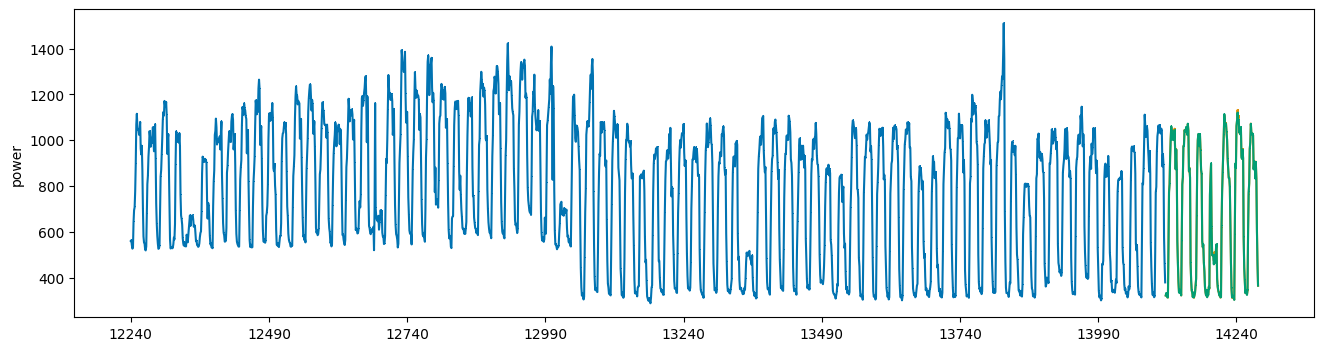

In [ ]:
pred = xgb_reg.predict(x_valid)
pred = pd.Series(pred)
pred.index = np.arange(y_valid.index[0], y_valid.index[-1]+1)
plot_series(y_train, y_valid, pd.Series(pred), markers=[',' , ',', ','])

print('best iterations: {}'.format(xgb_reg.best_iteration))
print('SMAPE : {}'.format(SMAPE(y_valid, pred)))

In [ ]:
x

,temp,prec,wind,hum,sun,power,day,month,week,day_hour_mean,hour_std,holiday,sin_time,cos_time,THI,CDH
0,18.6,0.0,0.9,42.0,0.0,1085.28,2,6,22,1774.744615,446.882767,0,0.000000,1.000000,49.6576,-7.4
1,18.0,0.0,1.1,45.0,0.0,1047.36,2,6,22,1687.347692,439.662704,0,0.258819,0.965926,47.7625,-15.4
2,17.7,0.0,1.5,45.0,0.0,974.88,2,6,22,1571.483077,412.071906,0,0.500000,0.866025,47.2225,-23.7
3,16.7,0.0,1.4,48.0,0.0,953.76,2,6,22,1522.153846,391.205981,0,0.707107,0.707107,44.7856,-33.0
4,18.4,0.0,2.8,43.0,0.0,986.40,2,6,22,1506.793846,381.099697,0,0.866025,0.500000,49.0061,-40.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,25.5,0.0,2.9,63.0,0.1,2517.12,2,8,34,2571.470769,377.509334,0,-0.965926,0.258819,60.1141,3.1
2036,25.0,0.0,2.6,66.0,0.0,2208.96,2,8,34,2391.027692,356.589629,0,-0.866025,0.500000,59.6464,4.3
2037,24.6,0.0,1.3,67.0,0.0,1806.24,2,8,34,1887.950769,216.680162,0,-0.707107,0.707107,59.1101,4.2
2038,24.1,0.0,2.1,70.0,0.0,1387.20,2,8,34,1412.861538,114.999557,0,-0.500000,0.866025,58.8800,2.3
